BAB 1: UPLOAD DATASET


Dataset berhasil dimuat dengan 2505 baris data
Kolom dalam dataset: ['conversation_id_str', 'created_at', 'favorite_count', 'full_text', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str', 'username', 'label']

BAB 2: PREPROCESSING DATA
                                           full_text  \
0  @worksfess 19 tahun sempet nganggur dulu kurle...   
1  @jichangmicn aku sebenarnya mau kuliah terus n...   
2  @shinysoulxu Aamiin yaRabb semangat jugaa echa...   
3     @wonharunika sesama mahasiswa akhir relate sih   
4  @precioussmile23 Halo kak. Saya bisa Saya lulu...   
5  @kindahao ni klo mahasiswa akhir tp bener sesi...   
6                 @saouvysz Semangat mahasiswa akhir   
7  @hahakhal Semangat khal mahasiswa semester akh...   
8  @mayioye @cucvly rill mahasiswa sems akhir huf...   
9  @snowandcool @altbumi Aku kuliah dari masih ma...   

                                          clean_text 

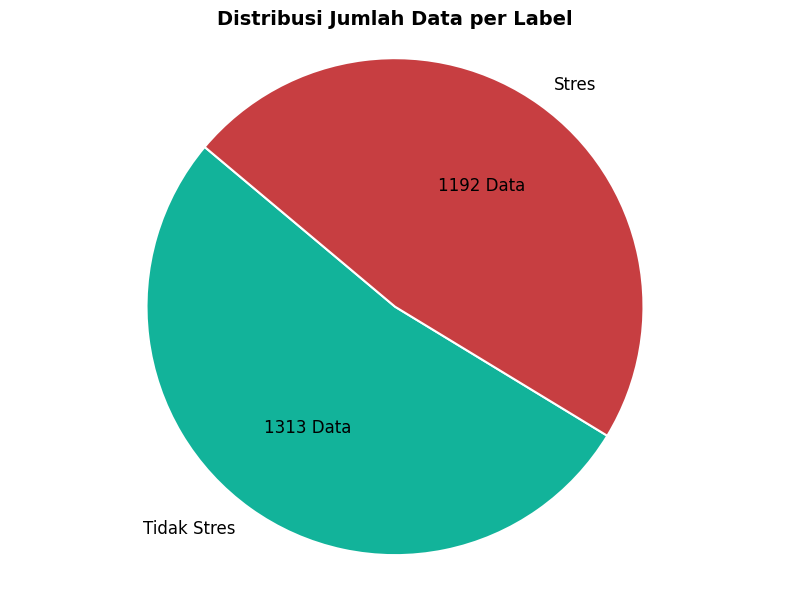


BAB 4: SPLITTING DATA
Data training: 2004 sampel
Data testing: 501 sampel

Contoh data training (80%):
                                                   text  label
0     sebelum stres nyari tiket aowkwkwk ni orang ud...      1
1     saya cowok tahun sekarang masih kuliah aku per...      1
2     akuuu dari kapan ya udha ga beli baju baru dar...      1
3     apakah mahasiswa yg bundir gila dan sejenisnya...      0
4     gue juga wondering apalagi yang udah kerja kay...      1
1999  tutur kata yang teratur asik ceria mahasiswa p...      0
2000  mamah ku awalnya diem aja ga peduli tanggepann...      1
2001  kita ngga bisa pasrah guys ayo mahasiswa akade...      1
2002  keren bgt itts mahasiswa baru udah di gembleng...      0
2003  ya kalo mahasiswa nya gak anarkis mereka juga ...      0

Contoh data testing (20%):
                                                  text  label
0    bikin ngakak ni guys mahasiswa praktek jdi org...      0
1    otw skripsian bikin mukaku redup min butuh yg 

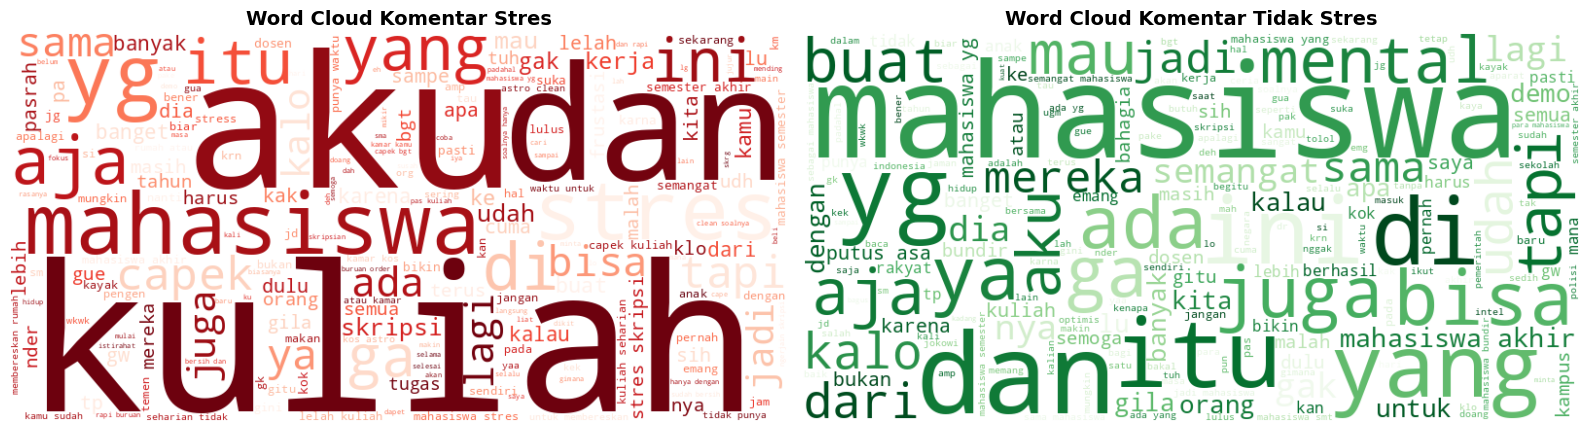


BAB 7: PELATIHAN MODEL
Model Logistic Regression berhasil dilatih!
Jumlah iterasi: 25

BAB 8: PREDIKSI
Prediksi berhasil dilakukan pada data testing!
Jumlah prediksi: 501

BAB 9: CONFUSION MATRIX


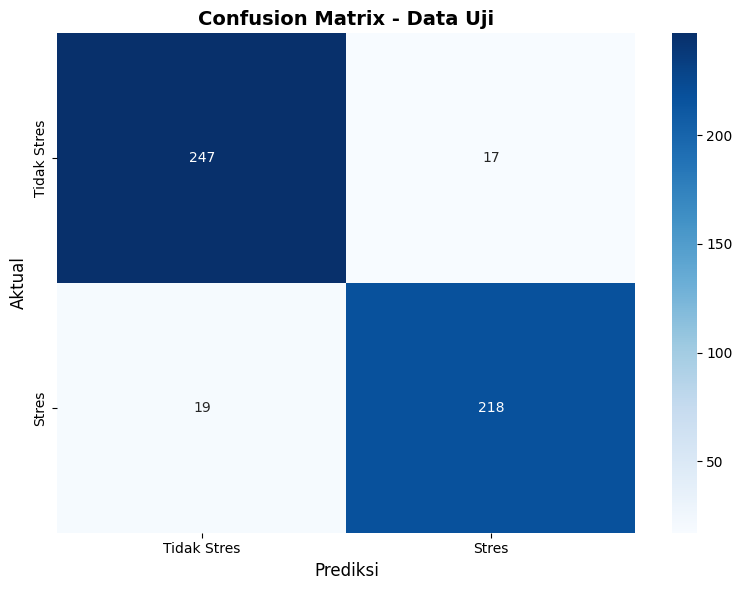

Nilai Confusion Matrix:
True Negative (TN): 247 - Prediksi Tidak Stres, Aktual Tidak Stres
False Positive (FP): 17 - Prediksi Stres, Aktual Tidak Stres
False Negative (FN): 19 - Prediksi Tidak Stres, Aktual Stres
True Positive (TP): 218 - Prediksi Stres, Aktual Stres

BAB 10: CLASSIFICATION REPORT
Evaluasi Model pada Data Uji:
              precision    recall  f1-score   support

 Tidak Stres       0.93      0.94      0.93       264
       Stres       0.93      0.92      0.92       237

    accuracy                           0.93       501
   macro avg       0.93      0.93      0.93       501
weighted avg       0.93      0.93      0.93       501


Akurasi Model: 0.9281 (92.81%)

BAB 11: HASIL PREDIKSI DETAIL

                                  Sampel Hasil Prediksi                                  
| Text                                                         | Label    | Prediksi        |
| karena marak berita mahasiswa depresi dan bundir ga si       | 1        | tidak stres     |
| 

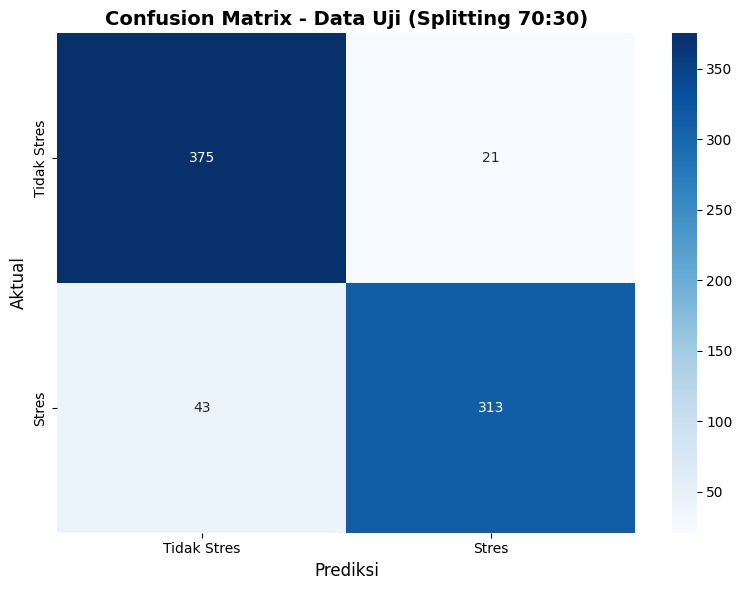

Nilai Confusion Matrix (Splitting 70:30):
True Negative (TN): 375 - Prediksi Tidak Stres, Aktual Tidak Stres
False Positive (FP): 21 - Prediksi Stres, Aktual Tidak Stres
False Negative (FN): 43 - Prediksi Tidak Stres, Aktual Stres
True Positive (TP): 313 - Prediksi Stres, Aktual Stres

BAB 14: CLASSIFICATION REPORT SPLITTING 70:30
Evaluasi Model pada Data Uji (Splitting 70:30):
              precision    recall  f1-score   support

 Tidak Stres       0.90      0.95      0.92       396
       Stres       0.94      0.88      0.91       356

    accuracy                           0.91       752
   macro avg       0.92      0.91      0.91       752
weighted avg       0.92      0.91      0.91       752


Akurasi Model (Splitting 70:30): 0.9149 (91.49%)

BAB 15: PERBANDINGAN HASIL KEDUA SPLITTING
PERBANDINGAN PERFORMA MODEL:
Metrik                    | 80:20           | 70:30          
------------------------------------------------------------
Akurasi                   | 0.9281 (92.81%) | 

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

# Install library wordcloud jika belum terinstal
!pip install wordcloud

from wordcloud import WordCloud

# === 1. UPLOAD DATASET ===
print("=" * 50)
print("BAB 1: UPLOAD DATASET")
print("=" * 50)

uploaded = files.upload()
df = pd.read_excel('dataset.xlsx')  

print(f"Dataset berhasil dimuat dengan {len(df)} baris data")
print(f"Kolom dalam dataset: {list(df.columns)}")

# === 2. PREPROCESSING DATA ===
print("\n" + "=" * 50)
print("BAB 2: PREPROCESSING DATA")
print("=" * 50)

def clean_text(text):
    text = re.sub(r'http\S+', '', str(text)) 
    text = re.sub(r'@\w+', '', text)  
    text = re.sub(r'#\w+', '', text) 
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = re.sub(r'\s+', ' ', text).strip()  
    return text.lower()

df['clean_text'] = df['full_text'].apply(clean_text)

df_display = df[['full_text', 'clean_text']]

print(df_display.head(10))  

print("\nDistribusi label dalam dataset:")
print(df['label'].value_counts())

# === 3. VISUALISASI DISTRIBUSI LABEL ===
print("\n" + "=" * 50)
print("BAB 3: VISUALISASI DISTRIBUSI LABEL")
print("=" * 50)

label_counts = df['label'].value_counts()
labels = ['Tidak Stres', 'Stres']
sizes = label_counts.tolist()
colors = ['#12B39A', '#C73E41']

plt.figure(figsize=(8, 6))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct=lambda p: f'{int(p * sum(sizes) / 100)} Data',
    startangle=140,
    colors=colors,
    textprops={'fontsize': 12, 'color': 'black'}
)

for w in wedges:
    w.set_edgecolor('white')
    w.set_linewidth(1.5)

plt.title('Distribusi Jumlah Data per Label', fontsize=14, fontweight='bold')
plt.axis('equal')  
plt.tight_layout()
plt.show()

# === 4. SPLITTING DATA 80:20 ===
print("\n" + "=" * 50)
print("BAB 4: SPLITTING DATA")
print("=" * 50)

X = df['clean_text']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

train_df = pd.DataFrame({'text': X_train, 'label': y_train})
test_df = pd.DataFrame({'text': X_test, 'label': y_test})

print(f"Data training: {len(train_df)} sampel")
print(f"Data testing: {len(test_df)} sampel")

print("\nContoh data training (80%):")
print(pd.concat([train_df.head(5), train_df.tail(5)]))

print("\nContoh data testing (20%):")
print(pd.concat([test_df.head(5), test_df.tail(5)]))

print("\n" + "=" * 50)
print("BAB 5: EKSTRAKSI FITUR TF-IDF")
print("=" * 50)

tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"Jumlah fitur TF-IDF: {X_train_tfidf.shape[1]}")

keywords = ['stres', 'mahasiswa', 'capek', 'cemas', 'panik', 'khawatir', 'depresi',
            'bahagia', 'ceria', 'optimis', 'positif', 'tenang', 'berharga', 'berhasil']

X_all_tfidf = tfidf.fit_transform(df['clean_text'])
df_tfidf = pd.DataFrame(X_all_tfidf.T.toarray(), index=tfidf.get_feature_names_out())

filtered_keywords = [word for word in df_tfidf.index if any(keyword in word for keyword in keywords)]
filtered_tfidf = df_tfidf.loc[filtered_keywords].sum(axis=1).sort_values(ascending=False)

print("\nHasil Ekstraksi Fitur TF-IDF (Top 10 kata relevan):")
print("=" * 50)
for i, (word, score) in enumerate(filtered_tfidf.head(10).items(), 1):
    print(f"{i:2d}. {word:<15} : {score:.4f}")

# === 6. WORD CLOUD VISUALIZATION ===
print("\n" + "=" * 50)
print("BAB 6: WORD CLOUD VISUALIZATION")
print("=" * 50)

text_stress = ' '.join(df[df['label'] == 1]['clean_text'])
text_not_stress = ' '.join(df[df['label'] == 0]['clean_text'])

wordcloud_stress = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(text_stress)
wordcloud_not_stress = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(text_not_stress)

plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_stress, interpolation='bilinear')
plt.title('Word Cloud Komentar Stres', fontsize=14, fontweight='bold')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_not_stress, interpolation='bilinear')
plt.title('Word Cloud Komentar Tidak Stres', fontsize=14, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

# === 7. PELATIHAN MODEL LOGISTIC REGRESSION ===
print("\n" + "=" * 50)
print("BAB 7: PELATIHAN MODEL")
print("=" * 50)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

print("Model Logistic Regression berhasil dilatih!")
print(f"Jumlah iterasi: {model.n_iter_[0]}")

# === 8. PREDIKSI ===
print("\n" + "=" * 50)
print("BAB 8: PREDIKSI")
print("=" * 50)

y_pred = model.predict(X_test_tfidf)

print("Prediksi berhasil dilakukan pada data testing!")
print(f"Jumlah prediksi: {len(y_pred)}")

# === 9. CONFUSION MATRIX ===
print("\n" + "=" * 50)
print("BAB 9: CONFUSION MATRIX")
print("=" * 50)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Tidak Stres', 'Stres'],
            yticklabels=['Tidak Stres', 'Stres'])
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Aktual", fontsize=12)
plt.title("Confusion Matrix - Data Uji", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Nilai Confusion Matrix:")
print("=" * 30)
print(f"True Negative (TN): {cm[0,0]} - Prediksi Tidak Stres, Aktual Tidak Stres")
print(f"False Positive (FP): {cm[0,1]} - Prediksi Stres, Aktual Tidak Stres")
print(f"False Negative (FN): {cm[1,0]} - Prediksi Tidak Stres, Aktual Stres")
print(f"True Positive (TP): {cm[1,1]} - Prediksi Stres, Aktual Stres")

# === 10. CLASSIFICATION REPORT ===
print("\n" + "=" * 50)
print("BAB 10: CLASSIFICATION REPORT")
print("=" * 50)

print("Evaluasi Model pada Data Uji:")
print("=" * 40)
print(classification_report(y_test, y_pred, target_names=['Tidak Stres', 'Stres']))

accuracy = (y_pred == y_test).mean()
print(f"\nAkurasi Model: {accuracy:.4f} ({accuracy*100:.2f}%)")

# === 11. HASIL PREDIKSI DETAIL ===
print("\n" + "=" * 50)
print("BAB 11: HASIL PREDIKSI DETAIL")
print("=" * 50)

prediksi_map = {1: 'stres', 0: 'tidak stres'}

test_results = pd.DataFrame({
    'Text': X_test,
    'Label': y_test,  
    'Prediksi': [prediksi_map[pred] for pred in y_pred]  
}).reset_index(drop=True)

sample_data = test_results.sample(n=10, random_state=42)

def print_table_rapi(df, title="Sampel Hasil Prediksi"):
   
    text_width = 60  
    label_width = 8  
    pred_width = 15 
    total_width = text_width + label_width + pred_width + 6 

    print(f"\n{title:^{total_width}}")
    print("=" * total_width)

    header = f"| {'Text':<{text_width}} | {'Label':<{label_width}} | {'Prediksi':<{pred_width}} |"
    print(header)
    print("=" * total_width)

    for _, row in df.iterrows():
       
        text = str(row['Text'])
        if len(text) > text_width:
            text = text[:text_width-3] + "..."

        baris = f"| {text:<{text_width}} | {str(row['Label']):<{label_width}} | {str(row['Prediksi']):<{pred_width}} |"
        print(baris)

    print("=" * total_width)

print_table_rapi(sample_data)

# === 12. PERBANDINGAN DENGAN SPLITTING DATA 70:30 ===
print("\n" + "=" * 60)
print("BAB 12: PERBANDINGAN DENGAN SPLITTING DATA 70:30")
print("=" * 60)

X_train_70, X_test_70, y_train_70, y_test_70 = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_70 = X_train_70.reset_index(drop=True)
y_train_70 = y_train_70.reset_index(drop=True)
X_test_70 = X_test_70.reset_index(drop=True)
y_test_70 = y_test_70.reset_index(drop=True)

tfidf_70 = TfidfVectorizer(max_features=3000, ngram_range=(1,2))
X_train_tfidf_70 = tfidf_70.fit_transform(X_train_70)
X_test_tfidf_70 = tfidf_70.transform(X_test_70)

# Pelatihan model untuk splitting 70:30
model_70 = LogisticRegression(max_iter=1000)
model_70.fit(X_train_tfidf_70, y_train_70)

# Prediksi untuk splitting 70:30
y_pred_70 = model_70.predict(X_test_tfidf_70)

print(f"Data training (70:30): {len(X_train_70)} sampel training, {len(X_test_70)} sampel testing")

# === 13. CONFUSION MATRIX SPLITTING 70:30 ===
print("\n" + "=" * 50)
print("BAB 13: CONFUSION MATRIX SPLITTING 70:30")
print("=" * 50)

cm_70 = confusion_matrix(y_test_70, y_pred_70)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_70, annot=True, fmt="d", cmap='Blues',
            xticklabels=['Tidak Stres', 'Stres'],
            yticklabels=['Tidak Stres', 'Stres'])
plt.xlabel("Prediksi", fontsize=12)
plt.ylabel("Aktual", fontsize=12)
plt.title("Confusion Matrix - Data Uji (Splitting 70:30)", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Tampilkan nilai confusion matrix untuk splitting 70:30
print("Nilai Confusion Matrix (Splitting 70:30):")
print("=" * 40)
print(f"True Negative (TN): {cm_70[0,0]} - Prediksi Tidak Stres, Aktual Tidak Stres")
print(f"False Positive (FP): {cm_70[0,1]} - Prediksi Stres, Aktual Tidak Stres")
print(f"False Negative (FN): {cm_70[1,0]} - Prediksi Tidak Stres, Aktual Stres")
print(f"True Positive (TP): {cm_70[1,1]} - Prediksi Stres, Aktual Stres")

# === 14. CLASSIFICATION REPORT SPLITTING 70:30 ===
print("\n" + "=" * 50)
print("BAB 14: CLASSIFICATION REPORT SPLITTING 70:30")
print("=" * 50)

print("Evaluasi Model pada Data Uji (Splitting 70:30):")
print("=" * 50)
print(classification_report(y_test_70, y_pred_70, target_names=['Tidak Stres', 'Stres']))

# Hitung metrik tambahan untuk splitting 70:30
accuracy_70 = (y_pred_70 == y_test_70).mean()
print(f"\nAkurasi Model (Splitting 70:30): {accuracy_70:.4f} ({accuracy_70*100:.2f}%)")

# === 15. PERBANDINGAN HASIL KEDUA SPLITTING ===
print("\n" + "=" * 60)
print("BAB 15: PERBANDINGAN HASIL KEDUA SPLITTING")
print("=" * 60)

accuracy_80 = (y_pred == y_test).mean()

print("PERBANDINGAN PERFORMA MODEL:")
print("=" * 40)
print(f"{'Metrik':<25} | {'80:20':<15} | {'70:30':<15}")
print("-" * 60)
print(f"{'Akurasi':<25} | {accuracy_80:.4f} ({accuracy_80*100:.2f}%) | {accuracy_70:.4f} ({accuracy_70*100:.2f}%)")
print(f"{'Data Training':<25} | {len(X_train):<15} | {len(X_train_70):<15}")
print(f"{'Data Testing':<25} | {len(X_test):<15} | {len(X_test_70):<15}")

# Hitung precision, recall, f1-score untuk kedua splitting
from sklearn.metrics import precision_score, recall_score, f1_score

precision_80 = precision_score(y_test, y_pred, average='weighted')
recall_80 = recall_score(y_test, y_pred, average='weighted')
f1_80 = f1_score(y_test, y_pred, average='weighted')

precision_70 = precision_score(y_test_70, y_pred_70, average='weighted')
recall_70 = recall_score(y_test_70, y_pred_70, average='weighted')
f1_70 = f1_score(y_test_70, y_pred_70, average='weighted')

print(f"{'Precision (Weighted)':<25} | {precision_80:.4f} ({precision_80*100:.2f}%) | {precision_70:.4f} ({precision_70*100:.2f}%)")
print(f"{'Recall (Weighted)':<25} | {recall_80:.4f} ({recall_80*100:.2f}%) | {recall_70:.4f} ({recall_70*100:.2f}%)")
print(f"{'F1-Score (Weighted)':<25} | {f1_80:.4f} ({f1_80*100:.2f}%) | {f1_70:.4f} ({f1_70*100:.2f}%)")

if accuracy_80 > accuracy_70:
    print(f"\nKESIMPULAN: Splitting 80:20 memberikan performa yang LEBIH BAIK dengan selisih akurasi {(accuracy_80-accuracy_70)*100:.2f}%")
elif accuracy_70 > accuracy_80:
    print(f"\nKESIMPULAN: Splitting 70:30 memberikan performa yang LEBIH BAIK dengan selisih akurasi {(accuracy_70-accuracy_80)*100:.2f}%")
else:
    print(f"\nKESIMPULAN: Kedua splitting memberikan performa yang SAMA")

print("\n" + "=" * 50)
print("RINGKASAN HASIL PROJECT")
print("=" * 50)

print(f"• Total data: {len(df)} sampel")
print(f"• Data training: {len(train_df)} sampel (80%)")
print(f"• Data testing: {len(test_df)} sampel (20%)")
print(f"• Jumlah fitur TF-IDF: {X_train_tfidf.shape[1]}")
print(f"• Akurasi model (80:20): {(y_pred == y_test).mean():.4f} ({(y_pred == y_test).mean()*100:.2f}%)")
print(f"• Akurasi model (70:30): {accuracy_70:.4f} ({accuracy_70*100:.2f}%)")

print("\nProject selesai dijalankan!")